<a href="https://www.kaggle.com/code/samyamaryal1/model-xg-boost?scriptVersionId=137056701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocessed-file/preprocessed_file.csv


In [2]:
v_features = ['V1', 'V2',
 'V4', 'V6', 'V7', 'V15',
 'V17', 'V23', 'V25', 'V29',
 'V42', 'V44', 'V46',
 'V47', 'V49', 'V52', 'V53', 'V55', 'V61', 'V66', 'V74', 'V78', 'V82',
 'V86', 'V87', 'V99', 'V107', 'V108', 'V109', 'V111', 'V114', 'V115', 'V119', 'V120', 'V123', 'V129', 'V130', 'V131', 'V135', 'V136', 'V144', 'V148', 'V158', 'V161', 'V166', 'V170', 'V171', 'V172', 'V175', 'V176', 'V181', 'V185', 'V189', 'V194', 'V200', 'V208', 'V209', 'V210', 'V220', 'V223', 'V224', 'V228', 'V229', 'V230', 'V240', 'V241', 'V242', 'V246', 'V248', 'V258', 'V260', 'V264', 'V267', 'V268', 'V274', 'V285', 'V286', 'V289', 'V291', 'V305', 'V310', 'V311', 'V319',
 'V320', 'V335']

In [3]:
features = ['P_emaildomain_aim.com', 'P_emaildomain_anonymous.com',  'P_emaildomain_aol.com', 'P_emaildomain_att.net',
 'P_emaildomain_bellsouth.net', 'P_emaildomain_cableone.net', 'P_emaildomain_centurylink.net',
 'P_emaildomain_cfl.rr.com', 'P_emaildomain_charter.net',
 'P_emaildomain_comcast.net', 'P_emaildomain_cox.net',
 'P_emaildomain_icloud.com', 'P_emaildomain_juno.com',
 'P_emaildomain_live.com', 'P_emaildomain_live.com.mx',
 'P_emaildomain_live.fr', 'P_emaildomain_mac.com',
 'P_emaildomain_mail.com', 'P_emaildomain_me.com',
 'P_emaildomain_ptd.net', 'P_emaildomain_q.com',
 'P_emaildomain_roadrunner.com', 'P_emaildomain_rocketmail.com',
 'P_emaildomain_sbcglobal.net', 'P_emaildomain_sc.rr.com',
 'P_emaildomain_servicios-ta.com', 'P_emaildomain_suddenlink.net',
 'P_emaildomain_twc.com', 'P_emaildomain_ymail.com', 'R_emaildomain_aim.com', 
 'R_emaildomain_anonymous.com', 'R_emaildomain_aol.com', 'R_emaildomain_att.net','R_emaildomain_bellsouth.net', 'R_emaildomain_cableone.net', 'R_emaildomain_centurylink.net', 'R_emaildomain_cfl.rr.com', 'R_emaildomain_charter.net', 'R_emaildomain_comcast.net', 'R_emaildomain_cox.net', 'R_emaildomain_earthlink.net', 'R_emaildomain_embarqmail.com', 'R_emaildomain_mail.com', 'R_emaildomain_me.com', 'R_emaildomain_msn.com', 'R_emaildomain_netzero.com', 'R_emaildomain_netzero.net', 'R_emaildomain_optonline.net', 'R_emaildomain_protonmail.com', 'R_emaildomain_sc.rr.com', 'R_emaildomain_scranton.edu', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_suddenlink.net', 'R_emaildomain_twc.com', 'R_emaildomain_verizon.net', 'R_emaildomain_web.de', 'R_emaildomain_ymail.com', 'M1_F', 'M1_T', 'M2_F', 'M2_T', 'M3_F', 'M3_T', 'M4_M0', 'M4_M1', 'DeviceType_desktop', 'DeviceType_mobile', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C3', 'C5']

In [4]:
features.extend(v_features)

In [5]:
df = pd.read_csv('/kaggle/input/preprocessed-file/preprocessed_file.csv')

In [6]:
df['isFraud_x'].value_counts()

0    569847
1     20663
Name: isFraud_x, dtype: int64

In [7]:
y = df['isFraud_x'].copy()

In [8]:
X = df[features].copy()

In [9]:
X

,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,...,V285,V286,V289,V291,V305,V310,V311,V319,V320,V335
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.001073
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.001073
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.001073
3,0,0,0,0,0,0,0,0,0,0,...,0.105263,0.0,0.000000,0.000000,0.0,0.006422,0.0,0.00000,0.00000,0.001073
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590505,0,0,0,0,0,0,0,0,0,0,...,0.010526,0.0,0.083333,0.000000,0.0,0.000870,0.0,0.00000,0.00000,0.001073
590506,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.001073
590507,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.001073
590508,0,0,1,0,0,0,0,0,0,0,...,0.052632,0.0,0.083333,0.000949,0.0,0.012145,0.0,0.00000,0.00000,0.001073


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create classification matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [12]:
def conf_matrix(labels, preds):
    cm = confusion_matrix(labels, preds)
    print("Confusion Matrix:")
    print(cm)
    LABELS = ["No Fraud", "Fraud"]
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()

Accuracy score without class weights:  0.9759666187986019
Precision score without class weights:  0.8811926605504588
Recall without class weights:  0.3687140115163148
F1 score without class weights:  0.5198917456021651
ROC AUC score without class weights: 0.6834477105847945
Confusion Matrix:
[[142159    259]
 [  3289   1921]]


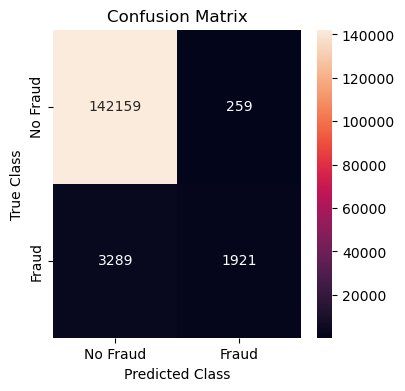

In [13]:
no_wt_model = XGBClassifier()
no_wt_model.fit(X_train, y_train)
no_wt_pred = no_wt_model.predict(X_test)
acc = accuracy_score(y_test, no_wt_pred)
prec = precision_score(y_test, no_wt_pred)
fone = f1_score(y_test, no_wt_pred)
rec = recall_score(y_test, no_wt_pred)
roc_score = roc_auc_score(y_test, no_wt_pred)
print("Accuracy score without class weights: ", acc)
print("Precision score without class weights: ", prec)
print("Recall without class weights: ", rec)
print("F1 score without class weights: ", fone)
print("ROC AUC score without class weights:", roc_score)
conf_matrix(y_test, no_wt_pred)

Accuracy score with class weights:  0.8822174655214458
Precision score with class weights:  0.19805613408707726
Recall with class weights:  0.7666026871401151
F1 score with class weights: 0.3147856242118537
ROC AUC score with class weights: 0.8265248125135901
Confusion Matrix:
[[126246  16172]
 [  1216   3994]]


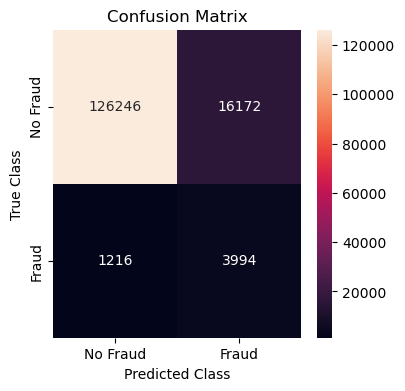

In [14]:
wt_model = XGBClassifier(scale_pos_weight = 28)
wt_model.fit(X_train, y_train)
wt_pred = wt_model.predict(X_test)
acc = accuracy_score(y_test, wt_pred)
prec = precision_score(y_test, wt_pred)
fone = f1_score(y_test, wt_pred)
rec = recall_score(y_test, wt_pred)
roc_score = roc_auc_score(y_test, wt_pred)
print("Accuracy score with class weights: ", acc)
print("Precision score with class weights: ", prec)
print("Recall with class weights: ", rec)
print("F1 score with class weights:", fone)
print("ROC AUC score with class weights:", roc_score)
conf_matrix(y_test, wt_pred)

In [15]:
fraud_data = df[df['isFraud_x']==1]

In [16]:
sampled_model = XGBClassifier()

In [17]:
roc_score_list = []
accuracy_list = []

In [18]:
non_fraud = df[df['isFraud_x']==0].sample(fraud_data.shape[0])
sampled_df = pd.concat([fraud_data, non_fraud])
sampled_X = sampled_df[features]
sampled_y = sampled_df['isFraud_x']
sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = train_test_split(sampled_X, sampled_y)
sampled_model.fit(sampled_X_train, sampled_y_train)
sampled_pred = sampled_model.predict(sampled_X_test)
roc_score_list.append(roc_auc_score(sampled_y_test, sampled_pred))
accuracy_list.append(accuracy_score(sampled_y_test, sampled_pred))

In [19]:
a, b = sampled_model.feature_importances_, sampled_model.feature_names_in_
temp = pd.DataFrame({'Importance': a, 'Feature': b})

In [20]:
list_of_relevant_features = temp.sort_values('Importance', ascending=False)[:50]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

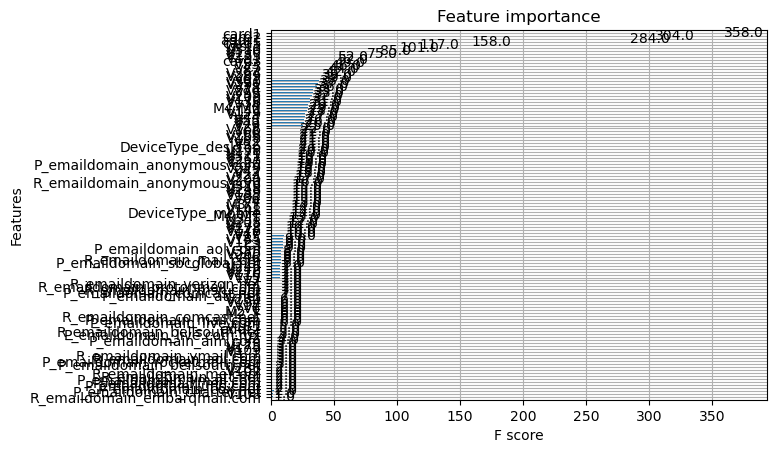

In [21]:
from xgboost import plot_importance
plot_importance(sampled_model)

In [22]:
roc_score

0.8265248125135901

In [23]:
fraud_data.drop('Unnamed: 0', axis=1, inplace=True)
non_fraud.drop('Unnamed: 0', axis=1, inplace=True)

/tmp/ipykernel_20/1052964398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data.drop('Unnamed: 0', axis=1, inplace=True)


In [24]:
for i in range(100):
    non_fraud = df[df['isFraud_x']==0].sample(fraud_data.shape[0])
    sampled_df = pd.concat([fraud_data, non_fraud])
    sampled_X = sampled_df[features]
    sampled_y = sampled_df['isFraud_x']
    sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = train_test_split(sampled_X, sampled_y)
    sampled_model.fit(sampled_X_train, sampled_y_train)
    sampled_pred = sampled_model.predict(sampled_X_test)
    roc_score_list.append(roc_auc_score(sampled_y_test, sampled_pred))
    accuracy_list.append(accuracy_score(sampled_y_test, sampled_pred))

In [25]:
import matplotlib.pyplot as plt

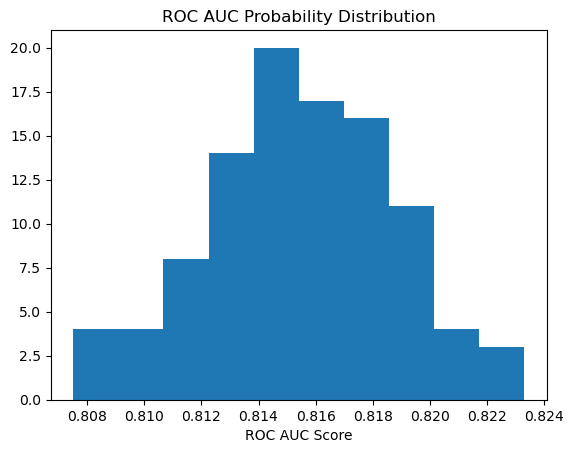

In [26]:
plt.hist(roc_score_list)
plt.xlabel('ROC AUC Score')
plt.title('ROC AUC Probability Distribution')
plt.show()

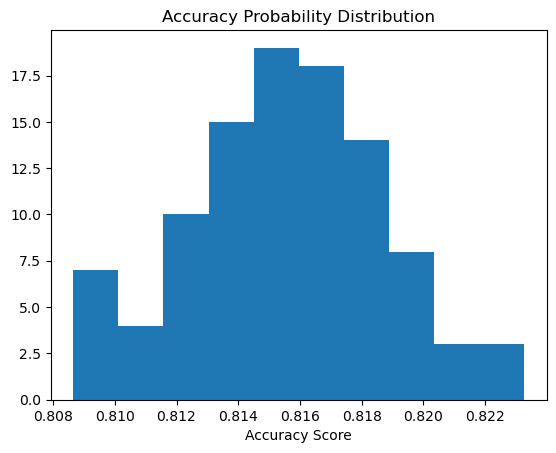

In [27]:
plt.hist(accuracy_list)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Probability Distribution')
plt.show()

In [28]:
np.mean(accuracy_list)

0.8155322500891207

In [29]:
np.mean(roc_score_list)

0.8155368453581873

In [30]:
sampled_y_test.shape

(10332,)

In [31]:
sampled_y_train.shape

(30994,)

Accuracy score with samples:  0.8200735578784359
Precision score with samples:  0.8472397808680995
Recall with samples:  0.780019398642095
F1 score with samples:  0.8122411877588122
ROC AUC score with samples: 0.8199884514941209
Confusion Matrix:
[[4452  725]
 [1134 4021]]


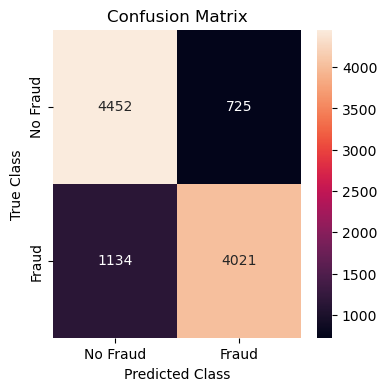

In [32]:
acc = accuracy_score(sampled_y_test, sampled_pred)
prec = precision_score(sampled_y_test, sampled_pred)
rec = recall_score(sampled_y_test, sampled_pred)
fone = f1_score(sampled_y_test, sampled_pred)
roc_score = roc_auc_score(sampled_y_test, sampled_pred)
print("Accuracy score with samples: ", acc)
print("Precision score with samples: ", prec)
print("Recall with samples: ", rec)
print("F1 score with samples: ", fone)
print("ROC AUC score with samples:", roc_score)
conf_matrix(sampled_y_test, sampled_pred)

In [33]:
a = list_of_relevant_features['Feature'].tolist()

In [34]:
a

['V258',
 'V29',
 'addr2',
 'V189',
 'V289',
 'DeviceType_mobile',
 'V200',
 'V52',
 'V44',
 'V158',
 'C5',
 'V49',
 'V47',
 'V131',
 'V87',
 'V320',
 'V129',
 'V291',
 'V53',
 'R_emaildomain_anonymous.com',
 'V61',
 'M2_F',
 'card3',
 'V144',
 'M3_T',
 'P_emaildomain_live.com',
 'P_emaildomain_mail.com',
 'C3',
 'P_emaildomain_ymail.com',
 'V175',
 'V171',
 'V109',
 'P_emaildomain_sbcglobal.net',
 'V310',
 'V108',
 'V7',
 'P_emaildomain_anonymous.com',
 'M3_F',
 'V82',
 'V99',
 'card5',
 'P_emaildomain_me.com',
 'V285',
 'V66',
 'V148',
 'V161',
 'M4_M1',
 'card2',
 'V268',
 'M1_T']

Accuracy score with sampled model:  0.8532595442598965
Precision score with sampled model:  0.16920664280831557
Recall with sampled model:  0.8076775431861805
F1 score with sampled model:  0.27979653578908875
ROC AUC score with sampled model: 0.8313022944623905
Confusion Matrix:
[[121757  20661]
 [  1002   4208]]


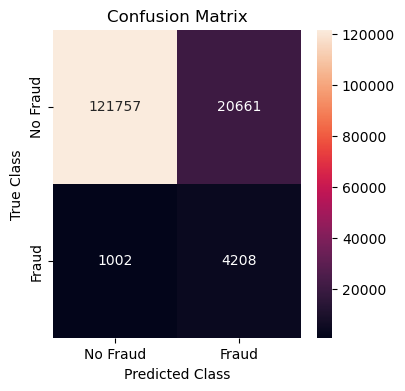

In [35]:
sampled_predictions = sampled_model.predict(X_test)
acc = accuracy_score(y_test, sampled_predictions)
prec = precision_score(y_test, sampled_predictions)
rec = recall_score(y_test, sampled_predictions)
fone = f1_score(y_test, sampled_predictions)
roc_score = roc_auc_score(y_test, sampled_predictions)
print("Accuracy score with sampled model: ", acc)
print("Precision score with sampled model: ", prec)
print("Recall with sampled model: ", rec)
print("F1 score with sampled model: ", fone)
print("ROC AUC score with sampled model:", roc_score)
conf_matrix(y_test, sampled_predictions)